<a href="https://colab.research.google.com/github/daiisntos/telecom-churn-analysis/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [3]:
import pandas as pd
import requests

In [4]:
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [5]:
response = requests.get(url)
data = response.json()

In [6]:
df= pd.DataFrame(data)
df.head() # Primeiramente analisar como estão distribuídos os dados

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [7]:
from pandas import json_normalize

In [8]:
df = json_normalize(data)
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [10]:
import numpy as np

In [11]:
df['customer.SeniorCitizen'] = df['customer.SeniorCitizen'].astype(np.int64)

In [12]:
df['customer.tenure'] = df['customer.tenure'].astype(np.int64)

In [13]:
df.isnull().sum() # Verificando se tem número nulo

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [14]:
df['account.Charges.Total'] = df['account.Charges.Total'].replace(' ', np.nan)

In [15]:
df['account.Charges.Total'] = df['account.Charges.Total'].astype(np.float64)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [17]:
df['account.Charges.Total'].fillna(0, inplace=True) #Substituindo valores vazios por 0

/tmp/ipython-input-2715968966.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['account.Charges.Total'].fillna(0, inplace=True) #Substituindo valores vazios por 0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
(df == "").sum()
(df == " ").sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [21]:
df.applymap(lambda x: isinstance(x, str) and (x != x.strip())).any()

/tmp/ipython-input-558734329.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(lambda x: isinstance(x, str) and (x != x.strip())).any()


,0
customerID,False
Churn,False
customer.gender,False
customer.SeniorCitizen,False
customer.Partner,False
customer.Dependents,False
customer.tenure,False
phone.PhoneService,False
phone.MultipleLines,False
internet.InternetService,False


In [22]:
colunas_importantes = [
    "customer.tenure",
    "account.Contract",
    "account.Charges.Monthly",
    "account.PaymentMethod",
    "internet.InternetService",
    "internet.OnlineSecurity",
    "internet.TechSupport",
    "phone.MultipleLines",
    "account.PaperlessBilling",
    "customer.SeniorCitizen",
    "Churn"
]

In [23]:
df_analisado = df[colunas_importantes]

In [24]:
df_analisado.head()

,customer.tenure,account.Contract,account.Charges.Monthly,account.PaymentMethod,internet.InternetService,internet.OnlineSecurity,internet.TechSupport,phone.MultipleLines,account.PaperlessBilling,customer.SeniorCitizen,Churn
0,9,One year,65.6,Mailed check,DSL,No,Yes,No,Yes,0,No
1,9,Month-to-month,59.9,Mailed check,DSL,No,No,Yes,No,0,No
2,4,Month-to-month,73.9,Electronic check,Fiber optic,No,No,No,Yes,0,Yes
3,13,Month-to-month,98.0,Electronic check,Fiber optic,No,No,No,Yes,1,Yes
4,3,Month-to-month,83.9,Mailed check,Fiber optic,No,Yes,No,Yes,1,Yes


In [25]:
df_analisado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer.tenure           7267 non-null   int64  
 1   account.Contract          7267 non-null   object 
 2   account.Charges.Monthly   7267 non-null   float64
 3   account.PaymentMethod     7267 non-null   object 
 4   internet.InternetService  7267 non-null   object 
 5   internet.OnlineSecurity   7267 non-null   object 
 6   internet.TechSupport      7267 non-null   object 
 7   phone.MultipleLines       7267 non-null   object 
 8   account.PaperlessBilling  7267 non-null   object 
 9   customer.SeniorCitizen    7267 non-null   int64  
 10  Churn                     7267 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 624.6+ KB


In [26]:
df_analisado["Contas_Diarias"] = df_analisado['account.Charges.Monthly']/30

/tmp/ipython-input-3508211495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analisado["Contas_Diarias"] = df_analisado['account.Charges.Monthly']/30


In [27]:
colunas_Sim_Nao = [
    'internet.OnlineSecurity',
    "internet.TechSupport",
    "phone.MultipleLines",
    "account.PaperlessBilling",
    "Churn"
]

In [28]:
df_analisado[colunas_Sim_Nao] = df_analisado[colunas_Sim_Nao]. applymap(lambda x:1 if x =='Yes'else 0)

/tmp/ipython-input-3330316769.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_analisado[colunas_Sim_Nao] = df_analisado[colunas_Sim_Nao]. applymap(lambda x:1 if x =='Yes'else 0)
/tmp/ipython-input-3330316769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analisado[colunas_Sim_Nao] = df_analisado[colunas_Sim_Nao]. applymap(lambda x:1 if x =='Yes'else 0)


In [29]:
df_analisado.head()

,customer.tenure,account.Contract,account.Charges.Monthly,account.PaymentMethod,internet.InternetService,internet.OnlineSecurity,internet.TechSupport,phone.MultipleLines,account.PaperlessBilling,customer.SeniorCitizen,Churn,Contas_Diarias
0,9,One year,65.6,Mailed check,DSL,0,1,0,1,0,0,2.186667
1,9,Month-to-month,59.9,Mailed check,DSL,0,0,1,0,0,0,1.996667
2,4,Month-to-month,73.9,Electronic check,Fiber optic,0,0,0,1,0,1,2.463333
3,13,Month-to-month,98.0,Electronic check,Fiber optic,0,0,0,1,1,1,3.266667
4,3,Month-to-month,83.9,Mailed check,Fiber optic,0,1,0,1,1,1,2.796667


#📊 Carga e análise

In [30]:
df_analisado.describe()

,customer.tenure,account.Charges.Monthly,internet.OnlineSecurity,internet.TechSupport,phone.MultipleLines,account.PaperlessBilling,customer.SeniorCitizen,Churn,Contas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,0.285950,0.289528,0.421770,0.593230,0.162653,0.257190,2.157337
std,24.571773,30.129572,0.451897,0.453575,0.493876,0.491265,0.369074,0.437115,1.004319
min,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.608333
25%,9.000000,35.425000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.180833
50%,29.000000,70.300000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.343333
75%,55.000000,89.875000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.995833
max,72.000000,118.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.958333


In [31]:
df_analisado.mode()

,customer.tenure,account.Contract,account.Charges.Monthly,account.PaymentMethod,internet.InternetService,internet.OnlineSecurity,internet.TechSupport,phone.MultipleLines,account.PaperlessBilling,customer.SeniorCitizen,Churn,Contas_Diarias
0,1,Month-to-month,20.05,Electronic check,Fiber optic,0,0,0,1,0,0,0.668333


In [32]:
colunas_mediana = [
    'customer.tenure',
    'account.Charges.Monthly',
    'Contas_Diarias'
]

In [33]:
df_analisado[colunas_mediana].median()

,0
customer.tenure,29.000000
account.Charges.Monthly,70.300000
Contas_Diarias,2.343333


In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

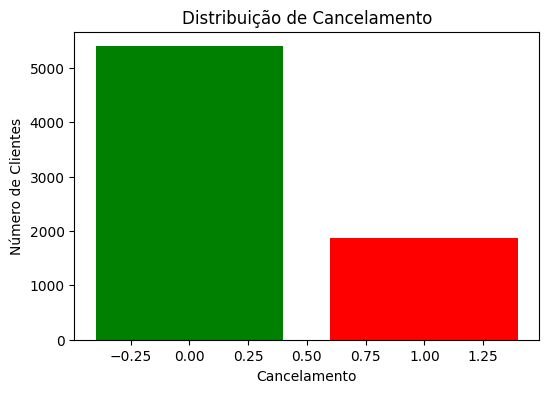

In [47]:
contagem = df_analisado['Churn'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(contagem.index, contagem.values, color=['green', 'red'])
plt.title('Distribuição de Cancelamento')
plt.xlabel('Cancelamento')
plt.ylabel('Número de Clientes')
plt.show()

/tmp/ipython-input-1390807108.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='customer.tenure', data=df_analisado, palette='Set2')


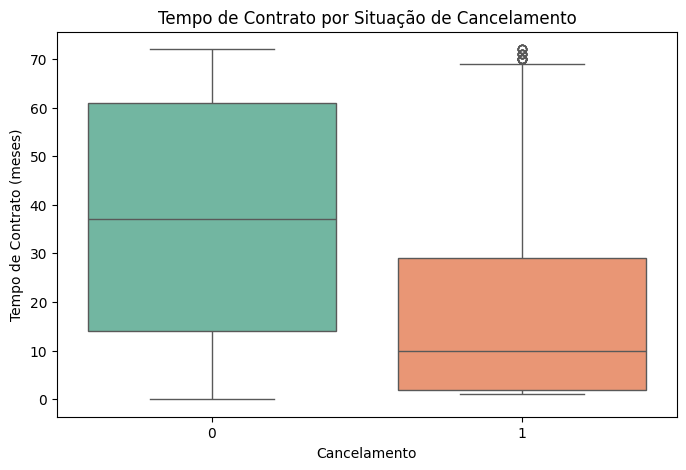

In [45]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='customer.tenure', data=df_analisado, palette='Set2')
plt.title('Tempo de Contrato por Situação de Cancelamento')
plt.xlabel('Cancelamento')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()


In [37]:
variaveis_categoricas = df_analisado.select_dtypes(include='object').columns.tolist()
variaveis_categoricas = [col for col in variaveis_categoricas if col not in ['IDCliente', 'Churn']]

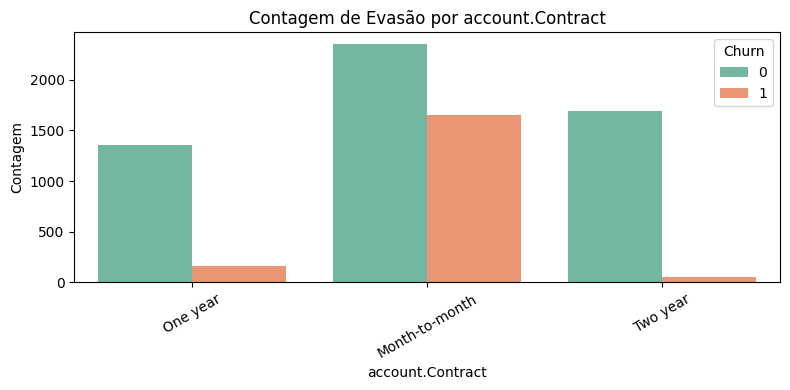

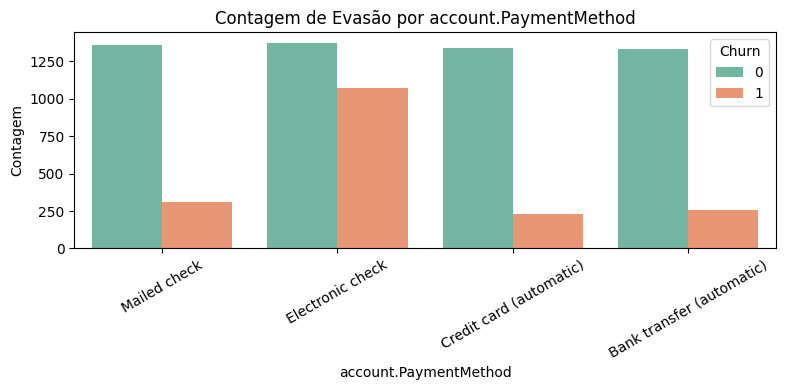

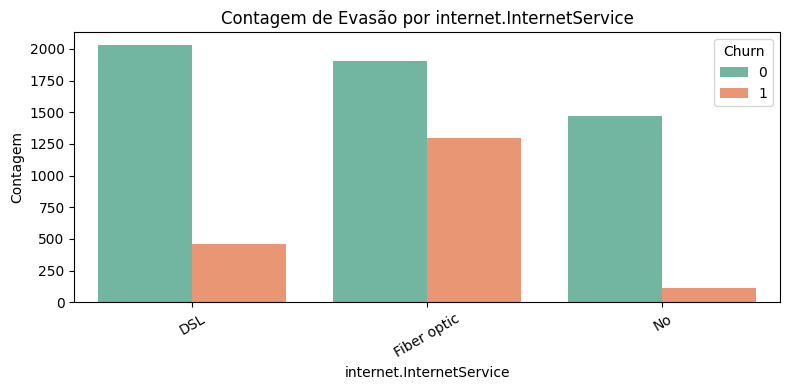

In [48]:
for coluna in variaveis_categoricas:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df_analisado, x=coluna, hue='Churn', palette='Set2' )
    plt.title(f'Contagem de Evasão por {coluna}')
    plt.xticks(rotation=30)
    plt.xlabel(coluna)
    plt.ylabel('Contagem')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

#📄Relatorio Final

# **Relatório Final**
Este relatório apresenta as principais etapas de extração, transformação e análise exploratória dos dados de clientes de telecomunicações, com o objetivo de identificar fatores relacionados à evasão de clientes (Churn).

# Extração e Transformação dos Dados
Os dados foram extraídos a partir de uma URL e carregados em um DataFrame do pandas. A estrutura aninhada do arquivo JSON foi normalizada utilizando a função json_normalize, facilitando a manipulação e análise.

Na etapa de transformação, foi identificada a presença de valores representados por espaços vazios na coluna account.Charges.Total. Esses valores foram substituídos por NaN (Not a Number) e posteriormente convertidos para o tipo numérico (float64). Os valores NaN foram então preenchidos com zero. Além disso, foram verificadas a existência de valores nulos e duplicados, não sendo encontrados problemas nessas verificações.

Para a análise, foi criado um novo DataFrame (df_analisado) contendo as colunas consideradas mais relevantes para o estudo do Churn:

customer.tenure

account.Contract

account.Charges.Monthly

account.PaymentMethod

internet.InternetService

internet.OnlineSecurity

internet.TechSupport

phone.MultipleLines

account.PaperlessBilling

customer.SeniorCitizen

Churn

As colunas categóricas com valores "Yes"/"No" foram convertidas para valores binários (1 e 0, respectivamente), possibilitando análises quantitativas. Também foi criada a coluna Contas_Diarias, calculada a partir do valor mensal dividido por 30, para uma visão mais detalhada dos gastos diários dos clientes.

# Análise Exploratória dos Dados
A análise descritiva (df_analisado.describe()) forneceu um resumo estatístico das variáveis numéricas, incluindo média, desvio padrão, valores mínimo e máximo, e quartis. Além disso, foram calculadas a moda e a mediana dessas variáveis.

A distribuição da variável Churn foi visualizada por meio de um gráfico de barras, evidenciando a proporção de clientes que cancelaram o serviço (Churn = 1) em relação aos que permaneceram (Churn = 0).

Foi gerado um boxplot para analisar a relação entre o tempo de contrato (customer.tenure) e a ocorrência de Churn, sugerindo que clientes com menor tempo de contrato apresentam maior probabilidade de cancelamento.

Principais Insights dos Gráficos de Contagem de Evasão (Churn)
Serviço de Internet (internet.InternetService): A maioria dos clientes que cancelaram utiliza os serviços DSL ou Fiber optic. O churn é significativamente maior entre clientes com Fiber optic em comparação aos que não possuem serviço de internet.

Método de Pagamento (account.PaymentMethod): O maior número de cancelamentos ocorre entre clientes que utilizam cheque eletrônico (Electronic check). Métodos automáticos, como cartão de crédito e transferência bancária, apresentam menor taxa de churn.

Tipo de Contrato (account.Contract): Clientes com contrato mensal (Month-to-month) têm muito mais cancelamentos do que aqueles com contratos anuais (One year ou Two year), indicando maior instabilidade em contratos de curto prazo.

